In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('etc.csv',parse_dates=True, index_col=('date'))
df.dropna(inplace=True)

In [3]:
df.rename(columns={'date':'Date','PriceUSD':'Close'}, inplace=True)

df.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,...,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,High,Low
date,,,,,,,,,,,,,,,,,,,,,
2017-07-25,14928,6116,7168630,1172.110857,1.372317e+09,9.500000e+13,0.000565,0.008245,0.00042,0.006124,...,1077.725576,1.010053,14.728569,2732824.500,39849980.89,0.082576,0.079857,0.079565,15.93,14.49
2017-07-26,14582,6060,7066567,1166.100165,1.378569e+09,9.630000e+13,0.000567,0.008303,0.00042,0.006150,...,831.627892,1.006410,14.737342,2046829.122,29972700.85,0.082494,0.079560,0.079545,15.08,14.22
2017-07-27,14530,6009,6931031,1153.441671,1.364476e+09,9.550000e+13,0.000557,0.008070,0.00042,0.006085,...,441.798472,1.005109,14.562976,1064479.048,15423184.66,0.082513,0.079273,0.078816,14.83,14.60
2017-07-28,14426,6073,7122478,1172.810473,1.311199e+09,9.640000e+13,0.000570,0.007935,0.00042,0.005846,...,667.089446,1.006916,14.014768,1746600.097,24310073.59,0.082587,0.079075,0.078957,14.75,14.04
2017-07-29,14782,6037,7637527,1265.119596,1.345891e+09,9.900000e+13,0.000766,0.010937,0.00042,0.005998,...,802.003184,1.006722,14.378021,2023648.688,28901788.74,0.082566,0.079014,0.078808,14.47,13.48


In [4]:
df['Return'] = df['Close'].pct_change() * 100
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()
df.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,...,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,High,Low,Return,Lagged_Return
date,,,,,,,,,,,,,,,,,,,,,
2017-07-27,14530,6009,6931031,1153.441671,1.364476e+09,9.550000e+13,0.000557,0.008070,0.00042,0.006085,...,14.562976,1064479.048,15423184.66,0.082513,0.079273,0.078816,14.83,14.60,-1.055274,0.421780
2017-07-28,14426,6073,7122478,1172.810473,1.311199e+09,9.640000e+13,0.000570,0.007935,0.00042,0.005846,...,14.014768,1746600.097,24310073.59,0.082587,0.079075,0.078957,14.75,14.04,-3.937065,-1.055274
2017-07-29,14782,6037,7637527,1265.119596,1.345891e+09,9.900000e+13,0.000766,0.010937,0.00042,0.005998,...,14.378021,2023648.688,28901788.74,0.082566,0.079014,0.078808,14.47,13.48,2.611683,-3.937065
2017-07-30,14191,6041,7153280,1184.121834,1.298192e+09,9.770000e+13,0.000557,0.007666,0.00042,0.005784,...,13.856739,1128886.396,15546158.43,0.082647,0.079044,0.078909,14.41,13.76,-3.576421,2.611683
2017-07-31,16000,6118,7311273,1195.042988,1.300263e+09,1.010000e+14,0.000568,0.007834,0.00042,0.005791,...,13.887477,2228636.140,30729640.13,0.082644,0.078731,0.078757,14.14,13.55,0.125675,-3.576421


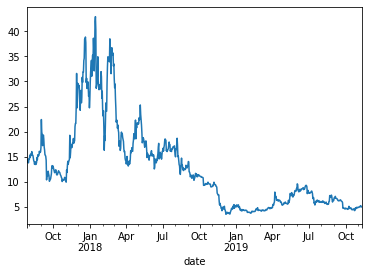

In [5]:
df.Close.plot()

In [6]:
train = df['2017':'2018']

In [7]:
test=df['2019']

In [8]:
# Create train and test sets for dependent and independent variables
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

In [9]:
# Create and fit model to the data, make predictions
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [10]:
# Construct a dataframe using just the "y" training data:
out_of_sample_results = y_test.to_frame()

# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002746AFF0208>,
      dtype=object)

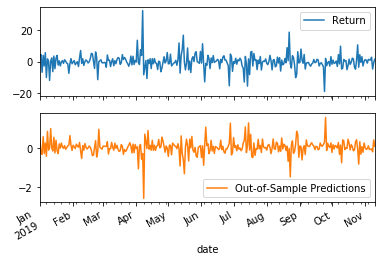

In [11]:
# Plot the out-of-sample results for 2019
out_of_sample_results.plot(subplots=True)

In [12]:
# Calculate out-of-sample mean_squared_error (for comparison to out-of-sample)
out_of_sample_mse = mean_squared_error(
    out_of_sample_results["Return"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Calculate out-of-sample root mean_squared_error (for comparison to out-of-sample)
out_of_sample_rmse = np.sqrt(out_of_sample_mse)
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 4.674654173727432


In [13]:
# Split the index into weekly periods
weeks = df.index.to_period("w").unique()
print(weeks[0])

2017-07-24/2017-07-30


In [14]:
# Declare the training window of 12 weeks
# Define the imeframe of rolling windows
training_window = 12
timeframe = len(weeks) - training_window - 1
print(timeframe)

107


In [15]:
# Construct empty placeholder dataframes.
# (During each iteration of the loop, we'll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Out-of-Sample Predictions"])
all_actuals = pd.DataFrame(columns=["Actual Returns"])

In [16]:
# During rolling iteration, split into train and test sets.
# Use linear regression to make out-of-sample predictions.
# Append the results to external dataframes.
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = weeks[i].start_time.strftime(format="%Y-%m-%d")
    
    # End of training window
    end_of_training_period = weeks[training_window+i].end_time.strftime(format="%Y-%m-%d")

    # Window of test-window data
    test_week = weeks[training_window + i + 1]
    
    # String of testing window
    start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
    end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
    
    train = df.loc[start_of_training_period:end_of_training_period]
    test = df.loc[start_of_test_week:end_of_test_week]
    
    # Create new dataframes:
    X_train = train["Lagged_Return"].to_frame()
    y_train = train["Return"]
    X_test = test["Lagged_Return"].to_frame()
    y_test = test["Return"]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Create a temporary dataframe to hold predictions
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Out-of-Sample Predictions"])
    
    # Create a temporary DataFrame of the actual "y"s in the test dataframe, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Returns"]  
    
    # Append these two dataframes (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)   
    

In [17]:
Results = pd.concat([all_actuals, all_predictions], axis=1)
Results.head()

,Actual Returns,Out-of-Sample Predictions
2017-10-23,-6.186571,-0.073354
2017-10-24,3.613726,0.269488
2017-10-25,0.419419,-0.425429
2017-10-26,-0.706239,-0.198928
2017-10-27,-1.080413,-0.119110


In [18]:
# 2019 Data
results_2019 = Results.loc['2019':]
results_2019

,Actual Returns,Out-of-Sample Predictions
2019-01-01,3.914856,-0.030544
2019-01-02,4.584130,-1.310794
2019-01-03,-6.662878,-1.403483
2019-01-04,4.067344,0.154135
2019-01-05,-2.659920,-1.331912
2019-01-06,5.783541,-0.400241
2019-01-07,-10.029986,-1.618154
2019-01-08,1.853180,0.902647
2019-01-09,0.412099,-0.991623
2019-01-10,-11.835939,-0.761904


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002746B1A0F60>,
      dtype=object)

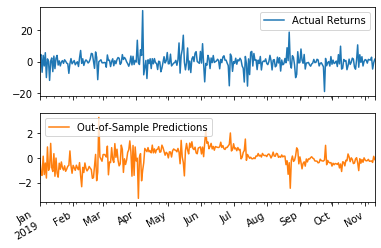

In [19]:
# Plot the results
results_2019.plot(subplots=True)

In [20]:
# Out-of-sample metrics
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe above)
mse = mean_squared_error(
    results_2019["Actual Returns"],
    results_2019["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rolling_rmse = np.sqrt(mse)
print(f"Rolling Out-of-Sample Root Mean Squared Error (RMSE): {rolling_rmse}")

Rolling Out-of-Sample Root Mean Squared Error (RMSE): 4.745119459225723


In [21]:
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Rolling Out-of-Sample Root Mean Squared Error (RMSE): {rolling_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 4.674654173727432
Rolling Out-of-Sample Root Mean Squared Error (RMSE): 4.745119459225723
